In [1]:
#imports
from SALA import processing
from SALA import plots
import pandas as pd
import pickle
import numpy as np

In [2]:
timing_data = pd.read_csv('data/SeattleHS/SHStimingData.csv')
timing_data

,Unnamed: 0,Date,First Light,Group,Last Light,Mins to FL from 4AM,Mins to LL from 4AM,Minutes above threshold,Threshold,Time above threshold,...,PM activity,Evening activity,Day mins abv light thresh,AM mins abv light thresh,PM mins abv light thresh,Evening mins abv light thresh,Moon brightness,Fell asleep minutes SLM,Woke up minutes SLM,DayType
0,0,2017-04-22,2017-04-22 08:02:00,Franklin 2017 seattle,2017-04-22 10:48:30,242.0,408.0,40.75,5,0 days 00:40:45.000000000,...,0.0,3827.0,46,46,0,0,5.0,1368.75,359.50,Out-of-school
1,1,2017-04-25,2017-04-25 07:08:45,Franklin 2017 seattle,2017-04-25 21:14:00,188.0,1034.0,491.75,5,0 days 08:11:45.000000000,...,121940.0,36572.0,545,240,306,13,2.0,1312.75,386.75,School days
2,2,2017-04-23,2017-04-23 06:09:15,Franklin 2017 seattle,2017-04-23 22:06:45,129.0,1086.0,167.50,5,0 days 02:47:30.000000000,...,65098.0,35416.0,183,74,109,4,4.0,1385.75,413.00,Out-of-school
3,3,2017-04-26,2017-04-26 06:50:30,Franklin 2017 seattle,2017-04-26 22:07:30,170.0,1087.0,523.00,5,0 days 08:43:00.000000000,...,106119.0,41159.0,557,239,319,22,1.0,1343.50,401.00,School days
4,4,2017-04-16,2017-04-16 18:04:30,Franklin 2017 seattle,2017-04-16 18:04:30,844.0,844.0,0.25,5,0 days 00:00:15.000000000,...,11402.0,0.0,1,0,1,0,10.0,1157.50,431.25,Out-of-school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18661,3106,2016-05-18,NaN,Franklin 2016 seattle,NaN,NaN,NaN,0.00,1000,0 days 00:00:00.000000000,...,212.0,NaN,0,0,0,0,11.0,NaN,NaN,School days
18662,3107,2016-05-25,2016-05-25 09:54:45,Franklin 2016 seattle,2016-05-25 09:54:45,354.0,354.0,0.25,1000,0 days 00:00:15.000000000,...,99365.0,22116.0,0,0,0,0,11.0,1406.75,404.00,School days
18663,3108,2016-06-01,2016-06-01 07:34:00,Franklin 2016 seattle,2016-06-01 17:18:00,214.0,798.0,59.00,1000,0 days 00:59:00.000000000,...,79326.0,14354.0,64,10,54,0,4.0,1383.00,396.25,School days
18664,3109,2016-05-19,2016-05-19 10:54:00,Franklin 2016 seattle,2016-05-19 15:00:30,414.0,660.0,23.00,1000,0 days 00:23:00.000000000,...,125883.0,7798.0,26,0,26,0,12.0,1341.50,391.50,School days


In [3]:
all_data = pd.read_parquet('data/SeattleHS/SHSrawData.parquet')
all_data

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group,DayofWeek,Date,GroupDayofWeek,GroupDayType,Weekend/Holiday
DateTime,,,,,,,,,,,,,,,,
2017-04-14 12:44:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,4,2017-04-14,Franklin 2017 Fri,Franklin 2017 Weekday,False
2017-04-14 12:44:15,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,4,2017-04-14,Franklin 2017 Fri,Franklin 2017 Weekday,False
2017-04-14 12:44:30,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,4,2017-04-14,Franklin 2017 Fri,Franklin 2017 Weekday,False
2017-04-14 12:44:45,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,4,2017-04-14,Franklin 2017 Fri,Franklin 2017 Weekday,False
2017-04-14 12:45:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,4,2017-04-14,Franklin 2017 Fri,Franklin 2017 Weekday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-02 14:24:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,Franklin 2016 seattle0052,Franklin 2016 seattle,3,2016-06-02,Franklin 2016 Thu,Franklin 2016 Weekday,False
2016-06-02 14:24:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,Franklin 2016 seattle0052,Franklin 2016 seattle,3,2016-06-02,Franklin 2016 Thu,Franklin 2016 Weekday,False
2016-06-02 14:24:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,Franklin 2016 seattle0052,Franklin 2016 seattle,3,2016-06-02,Franklin 2016 Thu,Franklin 2016 Weekday,False


In [4]:
# all_data['DateTime'] = pd.to_datetime(all_data['DateTime'])
# all_data.set_index('DateTime', inplace=True)
# all_data

In [5]:
no_school = all_data[all_data['Weekend/Holiday']==True]
no_school

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group,DayofWeek,Date,GroupDayofWeek,GroupDayType,Weekend/Holiday
DateTime,,,,,,,,,,,,,,,,
2017-04-15 00:00:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,5,2017-04-15,Franklin 2017 Sat,Franklin 2017 Weekend/Holiday,True
2017-04-15 00:00:15,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,5,2017-04-15,Franklin 2017 Sat,Franklin 2017 Weekend/Holiday,True
2017-04-15 00:00:30,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,5,2017-04-15,Franklin 2017 Sat,Franklin 2017 Weekend/Holiday,True
2017-04-15 00:00:45,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,5,2017-04-15,Franklin 2017 Sat,Franklin 2017 Weekend/Holiday,True
2017-04-15 00:01:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,5,2017-04-15,Franklin 2017 Sat,Franklin 2017 Weekend/Holiday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-30 23:58:45,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,REST-S,Franklin 2016 seattle0052,Franklin 2016 seattle,0,2016-05-30,Franklin 2016 Mon,Franklin 2016 Weekend/Holiday,True
2016-05-30 23:59:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,REST-S,Franklin 2016 seattle0052,Franklin 2016 seattle,0,2016-05-30,Franklin 2016 Mon,Franklin 2016 Weekend/Holiday,True
2016-05-30 23:59:15,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,REST-S,Franklin 2016 seattle0052,Franklin 2016 seattle,0,2016-05-30,Franklin 2016 Mon,Franklin 2016 Weekend/Holiday,True


In [6]:
these_rows = np.logical_and( np.logical_not(no_school['Off-Wrist Status']), np.logical_and( no_school['Interval Status'].isin(['ACTIVE','REST']), no_school['White Light']>1.0) ) 

In [7]:
no_school = no_school[these_rows]
no_school

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group,DayofWeek,Date,GroupDayofWeek,GroupDayType,Weekend/Holiday
DateTime,,,,,,,,,,,,,,,,
2017-04-16 18:04:30,0,48.0,0.0,140.47,54.0,27.900,26.600,NaN,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,6,2017-04-16,Franklin 2017 Sun,Franklin 2017 Weekend/Holiday,True
2017-04-16 18:05:45,0,411.0,0.0,2.42,18.0,1.560,0.778,1.0,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,6,2017-04-16,Franklin 2017 Sun,Franklin 2017 Weekend/Holiday,True
2017-04-16 18:06:00,0,328.0,0.0,1.44,10.7,0.936,0.464,1.0,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,6,2017-04-16,Franklin 2017 Sun,Franklin 2017 Weekend/Holiday,True
2017-04-16 18:06:15,0,385.0,0.0,1.59,11.8,1.030,0.511,1.0,ACTIVE,Franklin 2017 seattle0001,Franklin 2017 seattle,6,2017-04-16,Franklin 2017 Sun,Franklin 2017 Weekend/Holiday,True
2017-04-22 00:00:00,0,0.0,0.0,35.43,27.9,10.500,11.600,0.0,REST,Franklin 2017 seattle0001,Franklin 2017 seattle,5,2017-04-22,Franklin 2017 Sat,Franklin 2017 Weekend/Holiday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-30 22:43:30,0,154.0,0.0,6.75,51.4,7.950,3.040,1.0,ACTIVE,Franklin 2016 seattle0052,Franklin 2016 seattle,0,2016-05-30,Franklin 2016 Mon,Franklin 2016 Weekend/Holiday,True
2016-05-30 22:43:45,0,170.0,0.0,1.96,13.4,1.960,0.870,1.0,ACTIVE,Franklin 2016 seattle0052,Franklin 2016 seattle,0,2016-05-30,Franklin 2016 Mon,Franklin 2016 Weekend/Holiday,True
2016-05-30 22:44:00,0,129.0,0.0,3.06,23.7,3.070,1.380,1.0,ACTIVE,Franklin 2016 seattle0052,Franklin 2016 seattle,0,2016-05-30,Franklin 2016 Mon,Franklin 2016 Weekend/Holiday,True


In [15]:
#no_school.to_csv('data/SeattleHS/SHStimingDataNoSchool.csv')

In [8]:
no_school.Group.unique()

array(['Franklin 2017 seattle', 'Roosevelt 2017 seattle',
       'Roosevelt 2016 seattle', 'Franklin 2016 seattle'], dtype=object)

In [26]:
#When run on Group column will combine all 2017 and all 2016s together
def split_16_17(curText):
    if curText == 'Roosevelt 2017 seattle' or curText == 'Franklin 2017 seattle':
        return 'Seattle2017'
    elif curText == 'Roosevelt 2016 seattle' or curText == 'Franklin 2016 seattle':
        return 'Seattle2016'

In [10]:
no_school['Group'] = no_school['Group'].apply(split_16_17)
no_school

/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_29106/198075733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_school['Group'] = no_school['Group'].apply(split_16_17)


,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group,DayofWeek,Date,GroupDayofWeek,GroupDayType,Weekend/Holiday
DateTime,,,,,,,,,,,,,,,,
2017-04-16 18:04:30,0,48.0,0.0,140.47,54.0,27.900,26.600,NaN,ACTIVE,Franklin 2017 seattle0001,Seattle2017,6,2017-04-16,Franklin 2017 Sun,Franklin 2017 Weekend/Holiday,True
2017-04-16 18:05:45,0,411.0,0.0,2.42,18.0,1.560,0.778,1.0,ACTIVE,Franklin 2017 seattle0001,Seattle2017,6,2017-04-16,Franklin 2017 Sun,Franklin 2017 Weekend/Holiday,True
2017-04-16 18:06:00,0,328.0,0.0,1.44,10.7,0.936,0.464,1.0,ACTIVE,Franklin 2017 seattle0001,Seattle2017,6,2017-04-16,Franklin 2017 Sun,Franklin 2017 Weekend/Holiday,True
2017-04-16 18:06:15,0,385.0,0.0,1.59,11.8,1.030,0.511,1.0,ACTIVE,Franklin 2017 seattle0001,Seattle2017,6,2017-04-16,Franklin 2017 Sun,Franklin 2017 Weekend/Holiday,True
2017-04-22 00:00:00,0,0.0,0.0,35.43,27.9,10.500,11.600,0.0,REST,Franklin 2017 seattle0001,Seattle2017,5,2017-04-22,Franklin 2017 Sat,Franklin 2017 Weekend/Holiday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-30 22:43:30,0,154.0,0.0,6.75,51.4,7.950,3.040,1.0,ACTIVE,Franklin 2016 seattle0052,Seattle2016,0,2016-05-30,Franklin 2016 Mon,Franklin 2016 Weekend/Holiday,True
2016-05-30 22:43:45,0,170.0,0.0,1.96,13.4,1.960,0.870,1.0,ACTIVE,Franklin 2016 seattle0052,Seattle2016,0,2016-05-30,Franklin 2016 Mon,Franklin 2016 Weekend/Holiday,True
2016-05-30 22:44:00,0,129.0,0.0,3.06,23.7,3.070,1.380,1.0,ACTIVE,Franklin 2016 seattle0052,Seattle2016,0,2016-05-30,Franklin 2016 Mon,Franklin 2016 Weekend/Holiday,True


In [11]:
no_school.dtypes

Off-Wrist Status      int64
Activity            float64
Marker              float64
White Light         float64
Red Light           float64
Green Light         float64
Blue Light          float64
Sleep/Wake          float64
Interval Status      object
UID                  object
Group                object
DayofWeek             int64
Date                 object
GroupDayofWeek       object
GroupDayType         object
Weekend/Holiday        bool
dtype: object

In [12]:
no_school.Group.unique()

array(['Seattle2017', 'Seattle2016'], dtype=object)

In [13]:
no_school_2016 = no_school[(no_school['Group'] == 'Seattle2016')]
no_school_2016

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group,DayofWeek,Date,GroupDayofWeek,GroupDayType,Weekend/Holiday
DateTime,,,,,,,,,,,,,,,,
2016-04-23 06:54:15,0,229.0,0.0,1.15,0.736,1.18,0.769,1.0,ACTIVE,Roosevelt 2016 seattle0001,Seattle2016,5,2016-04-23,Roosevelt 2016 Sat,Roosevelt 2016 Weekend/Holiday,True
2016-04-23 06:54:30,0,350.0,0.0,1.50,4.420,1.07,1.090,1.0,ACTIVE,Roosevelt 2016 seattle0001,Seattle2016,5,2016-04-23,Roosevelt 2016 Sat,Roosevelt 2016 Weekend/Holiday,True
2016-04-23 06:55:00,0,105.0,0.0,2.43,6.950,2.35,0.760,1.0,ACTIVE,Roosevelt 2016 seattle0001,Seattle2016,5,2016-04-23,Roosevelt 2016 Sat,Roosevelt 2016 Weekend/Holiday,True
2016-04-23 06:55:15,0,125.0,0.0,8.04,12.600,8.42,2.650,1.0,ACTIVE,Roosevelt 2016 seattle0001,Seattle2016,5,2016-04-23,Roosevelt 2016 Sat,Roosevelt 2016 Weekend/Holiday,True
2016-04-23 06:55:30,0,52.0,0.0,2.38,11.500,1.73,0.729,1.0,ACTIVE,Roosevelt 2016 seattle0001,Seattle2016,5,2016-04-23,Roosevelt 2016 Sat,Roosevelt 2016 Weekend/Holiday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-30 22:43:30,0,154.0,0.0,6.75,51.400,7.95,3.040,1.0,ACTIVE,Franklin 2016 seattle0052,Seattle2016,0,2016-05-30,Franklin 2016 Mon,Franklin 2016 Weekend/Holiday,True
2016-05-30 22:43:45,0,170.0,0.0,1.96,13.400,1.96,0.870,1.0,ACTIVE,Franklin 2016 seattle0052,Seattle2016,0,2016-05-30,Franklin 2016 Mon,Franklin 2016 Weekend/Holiday,True
2016-05-30 22:44:00,0,129.0,0.0,3.06,23.700,3.07,1.380,1.0,ACTIVE,Franklin 2016 seattle0052,Seattle2016,0,2016-05-30,Franklin 2016 Mon,Franklin 2016 Weekend/Holiday,True


In [14]:
no_school_2017 = no_school[(no_school['Group'] == 'Seattle2017')]
no_school_2017

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group,DayofWeek,Date,GroupDayofWeek,GroupDayType,Weekend/Holiday
DateTime,,,,,,,,,,,,,,,,
2017-04-16 18:04:30,0,48.0,0.0,140.47,54.00,27.900,26.600,NaN,ACTIVE,Franklin 2017 seattle0001,Seattle2017,6,2017-04-16,Franklin 2017 Sun,Franklin 2017 Weekend/Holiday,True
2017-04-16 18:05:45,0,411.0,0.0,2.42,18.00,1.560,0.778,1.0,ACTIVE,Franklin 2017 seattle0001,Seattle2017,6,2017-04-16,Franklin 2017 Sun,Franklin 2017 Weekend/Holiday,True
2017-04-16 18:06:00,0,328.0,0.0,1.44,10.70,0.936,0.464,1.0,ACTIVE,Franklin 2017 seattle0001,Seattle2017,6,2017-04-16,Franklin 2017 Sun,Franklin 2017 Weekend/Holiday,True
2017-04-16 18:06:15,0,385.0,0.0,1.59,11.80,1.030,0.511,1.0,ACTIVE,Franklin 2017 seattle0001,Seattle2017,6,2017-04-16,Franklin 2017 Sun,Franklin 2017 Weekend/Holiday,True
2017-04-22 00:00:00,0,0.0,0.0,35.43,27.90,10.500,11.600,0.0,REST,Franklin 2017 seattle0001,Seattle2017,5,2017-04-22,Franklin 2017 Sat,Franklin 2017 Weekend/Holiday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-29 22:23:00,0,0.0,0.0,1.23,3.13,3.400,0.838,1.0,ACTIVE,Roosevelt 2017 seattle0059,Seattle2017,0,2017-05-29,Roosevelt 2017 Mon,Roosevelt 2017 Weekend/Holiday,True
2017-05-29 22:26:30,0,5.0,0.0,9.79,2.76,0.000,1.250,1.0,ACTIVE,Roosevelt 2017 seattle0059,Seattle2017,0,2017-05-29,Roosevelt 2017 Mon,Roosevelt 2017 Weekend/Holiday,True
2017-05-29 22:53:15,0,154.0,0.0,9.79,2.76,0.000,1.250,1.0,ACTIVE,Roosevelt 2017 seattle0059,Seattle2017,0,2017-05-29,Roosevelt 2017 Mon,Roosevelt 2017 Weekend/Holiday,True


In [15]:
def quarter_hourly(dtime):
    tm = pd.to_datetime('{}:{:02d}'.format(dtime.hour,(dtime.minute//15)*15))
    return tm.time()

In [21]:
for agroup in no_school.Group.unique():
    print(agroup)
    theones = (no_school.Group == agroup)
    exec('{} = no_school[theones].dropna().groupby(quarter_hourly).filter(lambda x: x["White Light"].count()>500,dropna=False).groupby(quarter_hourly)'.format(agroup.replace(' ','_'),  ))

Seattle2017
Seattle2016


Currently part unfinished: The plots generally match Professor Fleischer's GLM light analysis.ipynb but the small details and the cummulative lux values are off.

Seattle2016 - cumulative Lux*sec: 3.148708e+05, center of mass of light exposure: 12:43:00
Seattle2017 - cumulative Lux*sec: 3.830796e+05, center of mass of light exposure: 13:33:00


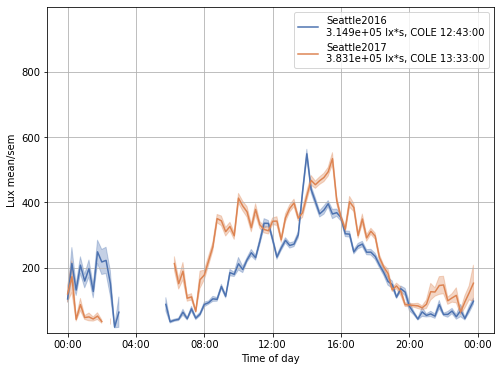

In [25]:
plots.LightPlot.plot([Seattle2016["White Light"],
                Seattle2017["White Light"]],
               ["Seattle2016", "Seattle2017"],
              y_lim = 1000)